<a href="https://colab.research.google.com/github/Azyyz77/Td_Python_WebScraping/blob/main/WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def main():
    print('Hello world!')

 if __name__ == "__main__":
    main()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [ ]:
def main():
    print('Hello world!')

if __name__ == "__main__": # Fixed: Indentation aligned with 'def main():'
    main()

Hello world!


In [ ]:
!python -m venv .venv

Error: Command '['/content/.venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.


In [ ]:
!.\.venv\Scripts\activate

/bin/bash: line 1: ..venvScriptsactivate: command not found


In [ ]:
!python scraper.py

python3: can't open file '/content/scraper.py': [Errno 2] No such file or directory


In [ ]:
def main():
  url = "https://news.ycombinator.com/item?id=42919502"
  print(f"Scraping: {url}")

if __name__ == "__main__":
  main()

Scraping: https://news.ycombinator.com/item?id=42919502


In [ ]:
pip install requests

In [ ]:
import requests

def main():
  url = "https://news.ycombinator.com/item?id=42919502"
  response = requests.get(url)
  print(f"Scraping: {url}")
  print(response)

if __name__ == "__main__":
  main()

Scraping: https://news.ycombinator.com/item?id=42919502
<Response [200]>


In [ ]:
print(response.content)

NameError: name 'response' is not defined

the changes

In [ ]:
pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

def main():
  url = "https://news.ycombinator.com/item?id=42919502"
  response = requests.get(url)

  soup = BeautifulSoup(response.content, "html.parser")
  # find all elements with class="comment"
  elements = soup.find_all(class_="comment")

  # Show the number of elementd found
  print(f"Elements: {len(elements)}")

if __name__ == "__main__":
  main()

Elements: 637


In [ ]:
import requests
from bs4 import BeautifulSoup

def main():
  url = "https://news.ycombinator.com/item?id=42919502"
  response = requests.get(url)

  soup = BeautifulSoup(response.content, "html.parser")
  # find all elements with class="ind" and indent level = 0
  elements = soup.find_all(class_="ind" , indent=0)
  # for each of this elements, find the next element
  comments = [e.find_next(class_="comment") for e in elements]

  # Show the number of comments found
  print(f"Comments: {len(comments)}")

if __name__ == "__main__":
  main()

Comments: 411


Replace  print(f"Comments: {len(comments)}") with for comment in comments:
  print(comment)

In [ ]:
import requests
from bs4 import BeautifulSoup

def main():
  url = "https://news.ycombinator.com/item?id=42919502"
  response = requests.get(url)

  soup = BeautifulSoup(response.content, "html.parser")
  # find all elements with class="ind" and indent level = 0
  elements = soup.find_all(class_="ind" , indent=0)
  # for each of this elements, find the next element
  comments = [e.find_next(class_="comment") for e in elements]

  # Show the number of comments found
  for comment in comments:
    print(comment) # Indented this line to be part of the for loop

if __name__ == "__main__":
  main()

<div class="comment">
<div class="commtext c00">MTA (think trains and buses) | Full-time | NYC | 3x/week in office<p>We're looking for two frontend software engineers! (Interviews are starting this week, we're very ready.)<p>Our team works on all the (non-ad) screens in the subway, as well as two apps (TrainTime and the MTA app) and our website. We're a team of 20, mostly engineers, a few PMs and a designer. We operate like a startup within the MTA and are responsible for all customer-facing digital endpoints.<p>See one of our products here: <a href="https://apps.apple.com/us/app/mta-traintime/id1104885987">https://apps.apple.com/us/app/mta-traintime/id1104885987</a> as well as some new screen designs here: <a href="https://www.reddit.com/r/nycrail/comments/1h2rqr6/new_countdown_clock_ui_at_rector_st/" rel="nofollow">https://www.reddit.com/r/nycrail/comments/1h2rqr6/new_countd...</a><p>Job description and application details: <a href="https://www.mta.info/document/163661" rel="nofollow

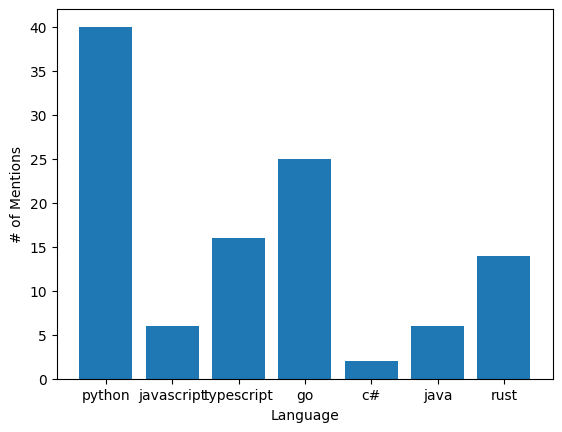

In [ ]:
import matplotlib.pyplot as plt # import the pyplot module and alias it as plt

import requests
from bs4 import BeautifulSoup

# Define keywords outside of the function to make it globally accessible
keywords = {"python": 0, "javascript": 0, "typescript": 0, "go": 0, "c#": 0, "java": 0, "rust": 0}

def main():
    url = "https://news.ycombinator.com/item?id=42919502"
    response = requests.get(url)

    soup = BeautifulSoup(response.content, "html.parser")
    # find all elements with class="ind" and indent level = 0
    elements = soup.find_all(class_="ind", indent=0)
    # for each of this elements, find the next element
    comments = [e.find_next(class_="comment") for e in elements]

    # Access the global keywords variable
    global keywords

    # show each comment (job post)
    for comment in comments:
        # get the comment text and lower case it
        comment_text = comment.get_text().lower()

        # split comment by space which create an array of words
        words = comment_text.split(" ")

        # Iterate over keywords and count occurrences
        for keyword in keywords:
            keywords[keyword] += words.count(keyword)


if __name__ == "__main__":
    main()

# plot a bar graph after calling main() to populate keywords
plt.bar(keywords.keys(), keywords.values())
# Add labels
plt.xlabel("Language")
plt.ylabel("# of Mentions")
plt.show()

In [ ]:
pip freeze > requirements.txt